<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None
job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                10

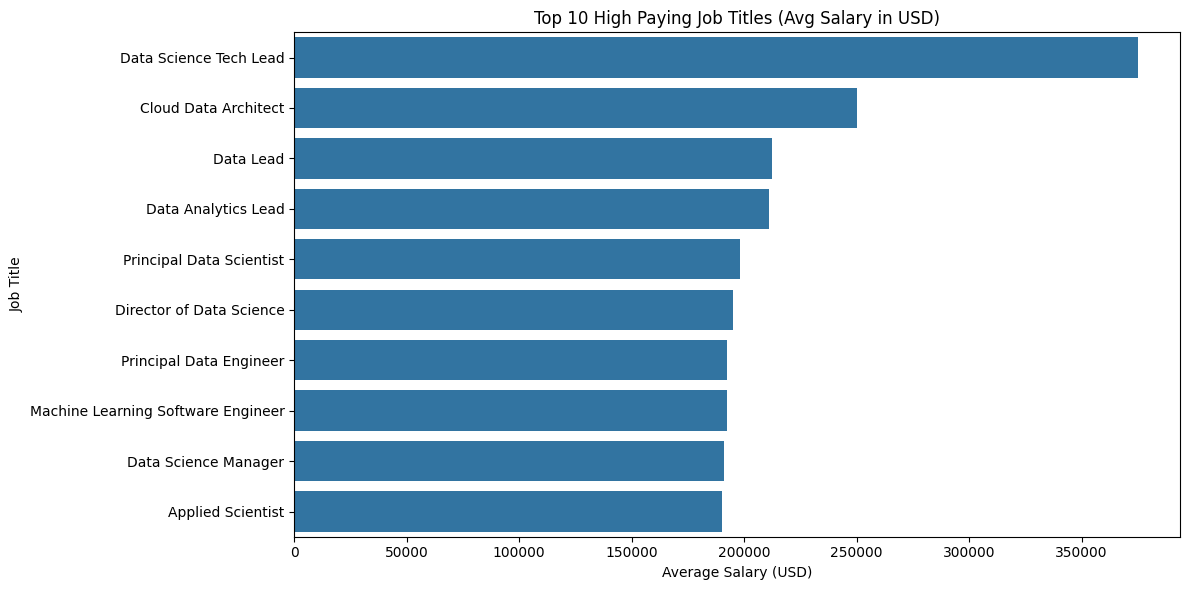

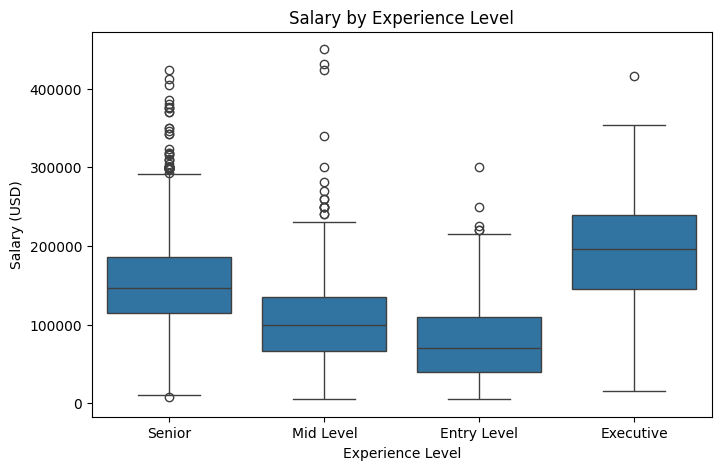

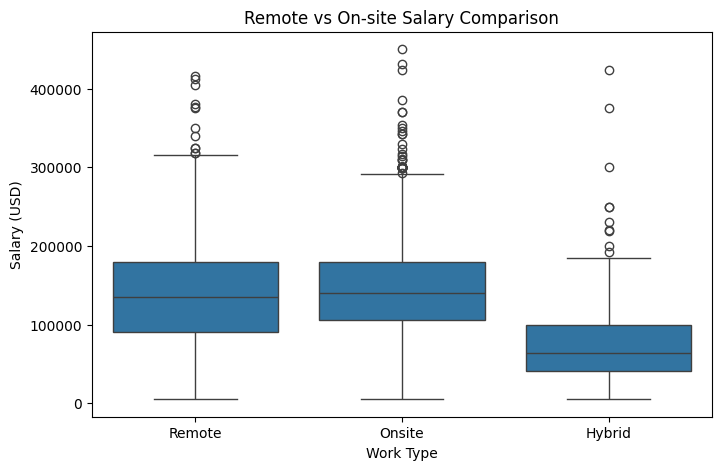

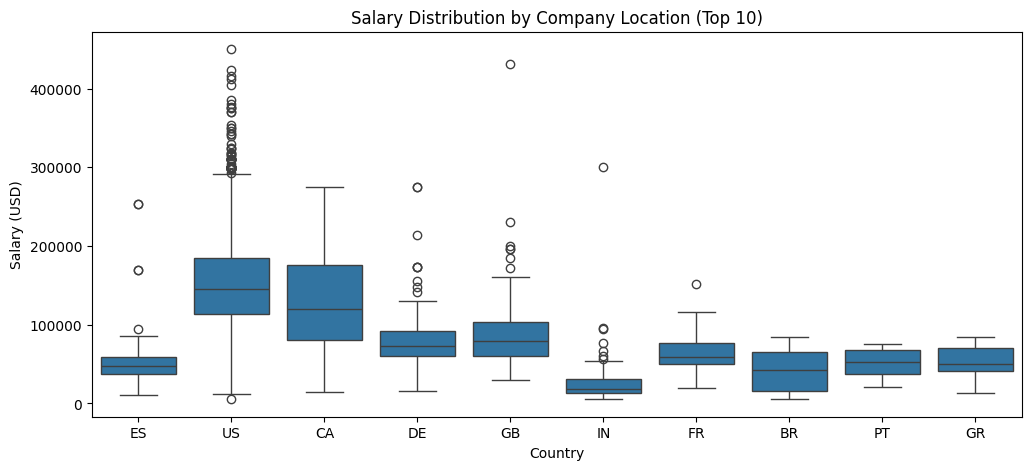

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('ds_salaries.csv')  # replace with your file name

# Convert salary_in_usd to numeric, coercing errors to NaN
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')

# Drop rows where salary_in_usd is NaN
df = df.dropna(subset=['salary_in_usd'])

# Basic info
print(df.info())

# Unique job titles
print(df['job_title'].value_counts().head(10))

# Plot Top 10 High Paying Job Titles by average salary
plt.figure(figsize=(12, 6))
# Group only salary_in_usd by job_title to avoid errors
top_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10).reset_index()

sns.barplot(
    y='job_title',
    x='salary_in_usd',
    data=top_jobs
)
plt.title("Top 10 High Paying Job Titles (Avg Salary in USD)")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

# Map experience levels
experience_map = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior',
    'EX': 'Executive'
}
df['experience_level'] = df['experience_level'].map(experience_map)

# Plot Salary by Experience Level
plt.figure(figsize=(8, 5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title("Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.show()

# Map remote_ratio
remote_map = {0: 'Onsite', 50: 'Hybrid', 100: 'Remote'}
df['remote_ratio'] = df['remote_ratio'].map(remote_map)

# Plot Remote vs On-site Salary Comparison
plt.figure(figsize=(8, 5))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title("Remote vs On-site Salary Comparison")
plt.xlabel("Work Type")
plt.ylabel("Salary (USD)")
plt.show()

# Top 10 countries by company_location count
top_countries = df['company_location'].value_counts().head(10).index
top_df = df[df['company_location'].isin(top_countries)]

# Plot Salary Distribution by Company Location (Top 10)
plt.figure(figsize=(12, 5))
sns.boxplot(x='company_location', y='salary_in_usd', data=top_df)
plt.title("Salary Distribution by Company Location (Top 10)")
plt.xlabel("Country")
plt.ylabel("Salary (USD)")
plt.show()

# To show the output summary in an understandable text manner

# top_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10).reset_index()
# print("Top 10 High Paying Job Titles with Average Salary (USD):")
# print(top_jobs)

# exp_salary = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
# print("\nAverage Salary by Experience Level:")
# print(exp_salary)

# remote_salary = df.groupby('remote_ratio')['salary_in_usd'].mean().reset_index()
# print("\nAverage Salary by Work Type (Remote Ratio):")
# print(remote_salary)

# top_country_salary = df[df['company_location'].isin(top_countries)].groupby('company_location')['salary_in_usd'].mean().reset_index()
# print("\nAverage Salary by Top 10 Company Locations:")
# print(top_country_salary)

